# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
The dataset contains allegations against NYPD officers all the way from September 1985 to January 2020. All allegations in the dataset have been investigated by a separate identity known as the Civilian Complaint Review Board (CCRB), who are *supposed* to be unbiased reviewers of each case. Each allegation has a determination outcome, which says whether or not the officer was guilty of the claim against them. With the recent BLM movement as my motivation, I am curious about whether in recent years there has been a racial bias in the ethnicities of accused NYPD members. Being that NYC is massively liberal and a mostly blue state, it would be interesting to see if there is a disparity among these ethnicities compared to actual NYPD demographics. NYC is known to be one of the most progressive and inclusive cities in the US, so we will see if the data reflects that. Even so, massive NYC is the most populated city in the US by a mile, so there are, of course, plenty of people in the city who do not agree with being inclusive of all ethnicites. This might be especially true for those in the NYPD. It goes without saying that not all of NYPD officers' wrongdoings are racially motivated. Regardless, I'd still expect to see a massive racial bias for complainants, where the majority of them would be filed by minorities. I say this because of the long history of police brutality by white officers against minorities in the US. With this, I am also curious about whether there seems to be clear-cut evidence of such corruption anywhere amongst NYC's many areas. In order to investigate racial bias and corruption of NYPD members, we will put special emphasis on the precinct, complainant ethniity, and officer ethnicity columns of the dataset. We want to answer the following questions: 
- Over the last decade, has there been a racial bias (or a significant difference) in the demographics of accused officers when compared to the forces' demographics as a whole? With historical contexts, if the answer turns out to be yes, it is most likely the case that white officers are to blame for this disparity.
- Is there a certain area or areas in NYC that appear to contain some form of corruption? Although this is a hard question to answer with so many potential confounding factors, we will do our best to designate one or more areas as suspicious.

### Cleaning and EDA
When cleaning the data, I started by looking through each column to see if missingness was explained in different ways. For example, in the shield_no column, missingness was usually defined as a shield_no of 0 instead of nans, since this is an integer column. Similarly, the precinct column contained an absurd amount of 0s and 1000s. This wouldn't make sense sicne there are not precincts with these numbers. If I had not filled these with nans, we might have seen much different results with our later analysis of NYC's precincts since there were so many precinct inputs of 0 and 1000. It was found that some of the complainant_ages were below 0, which also doesn't make sense. There were also "Unknown"s in the complainant_ethnicity column. For all of these cases, the mentioned observations were converted to nans. In order to retain the type of each of the integer columns, the columns were converted to type Int8 or Int16. Some of the complainant ages were found to be between ages 1 and 10. This wouldn't make much sense, since the age input should be that of the person filing the complaint. It is hard to imagine a child this young filing a formal complaint and more likely that the parent of a child filed it for them with the child's age (or that it was simply mistyped). For this reason, I was conservative and converted ages 8 and below to nans. Next, I added a few columns to the dataframe for potential future EDA/analysis. One of these columns added was the substantiated column. This column is a series of boolean which tells whether each allegation was found to be true or not. This column was useful in the hypotesis testing section, where it was tested whether or not there was a significant difference between guilty police demographics and demographics of NYPD police. It also proved useful in coming up for the idea of the question posed, since being accused of something is different from being guilty. Therefore, this was a crucial column that would help differentiate ethnicities of accused officers vs. guilty officers. Next, a column was added to aggregate the month/year columns into one for all-in-one access. This column did not end up being useful in analysis, since month of allegations weren't considered. EDA was focused mainly on inspecting the ethnicities and precincts of the data. Immediately after noticing how skewed the demographics for both complainant ethnicity and NYPD member ethnicity were, I knew this would be the focus of the project. With NYPD demographics, setup for a later hypothesis was done within the EDA section by pulling external NYPD demographics off a .gov site. With this and the demographics of recent allegations, a hypothesis test was ready to be done later down the line. The majority of the EDA section consisted of looking into the precinct data. Right off the bat, the 75th precinct had an extreme amount of allegations compared to the others. After taking population and substantiation rate into account before becoming suspicious of corruption, the precict still appeared extreme compared to the others. From here, this precinct was compared to other even more dangerous precincts using a metric that incorporated number of allegations per population times substantiation rate. This was the metric used because it normalizes by person and takes into account how many of the officers were found to be guilty of the claims against them. With these metrics, we're all set up for another hypothesis test (using a test that we haven't used in this class). 

### Assessment of Missingness
Since we see a large portion of missingness for the complainant ethnicity column, we are curious whether or not this is dependent on the ethnicity of the officer that the complainant had a negative experience with. Even though there is a "Refuse to Answer" option for complainant ethnicity, a complainant might feel that this option automatically identifies them as a minority. Thus, many complainants would opt to leave their answer blank instead. Yes, this column could definitely be NMAR, since a complainant might feel that including their ethnicity could undermine their case. However, I would argue that it would more often depend on the ethnicity of the officer. If a complainant had an issue with an officer of the same ethnicity, they would be less likely to feel that the officer's actions were racially motivated. Since this might take the focus off of ethnicity, I feel they would be more likely to include their ethnicity when filing a complaint. Therefore, we will observe whether this is the case.

In order to test whether this missingness is MAR dependent on the NYPD member's ethnicity, we will be conducting a permutation test with 1000 test statistics. Our test statistic here would be total variation distance since the column we are testing dependency on is categorical. To set this up we must first calculate our observed value. First, we separate allegations by missing and non-missing complainant ethnicity. A column of booleans was assigned to the dataframe, which told us whether the allegation had missing or non-missing complainant ethnicity. Then, we calculate the TVD between these two groups by calculating the sum of the absolute difference between each proportional ethnicity for missing vs. non-missing values. The obsrved TVD was 0.073. Next, we conducted the permutation test by shuffling the column that we recently created. For each trial, we repeated the calculation of our TVD, which resulted in different values since the boolean  column was randomly shuffled. After our 1000 trials, we found the proportion of our test statistics that were greater than or equal to our observed TVD to obtain our p-value. Of our generated test statistics, we never saw a TVD greater than or equal to our observed, so our p-value was 0. With a significance level of 0.01, this was stastically significant, so the null hypothesis was rejected. Therefore, it is likely that whether a complainant included their ethnicity is dependent on the ethnicity of the accused officer's ethnicity. 

Unfortunately, due to ethics, we should not try to fill in these missing values. This would not make sense to do anyways, since we have no reliable way of predicting the ethnicity of the complainant. If, for some nonsensical reason, we did try to fill in ethnicity, we would probably be wrong about many complainant ethnicities. Since our questions have more to do with NYPD member ethnicites rather than complainant ethnicites, this will not hinder our findings too much. I would expect the majority of the missing complainant ethnicites to be minorities uncomfortable with including their ethnicity in their claims. With the historical context and considering that we already see that over 80% of complainants are minorities, if the actual ethnicites of claims with missing complainant ethnicities were included, I could almost guarantee that we would see the same if not more disparity. 

### Hypothesis Test
To help answer the questions we've posed, we will conduct a few hypothesis tests. These will not give us a definite answer to our questions, but they will help us determine if there is a very strong likelihood of there being racial bias amongst accused NYPD officers and/or if there is police corruption in the 75hth precinct.

For our first question, we will conduct a permutation test to test whether it's highly likely that there is racial bias amongst accused NYPD officers. Our null hypothesis is that the proportional demographics of accused NYPD members comes from the distribution for proportional demographics of NYPD members. The alternative hypothesis is that proportional demographics of the accused NYPD members do not come from the distribution for proportional demographics of NYPD members. We will be comparing the demographics of NYPD members (from 2021) to the demographics of allegations from 2019 on. Since there are only 2 allegations in the dataset from 2020, the allegations included in this hypothesis are almost entirely from 2020. Unfortunately, we must make a naive assumption here in assuming that the 2021 demographics are similar to the 2019 demographics of the NYPD. They may not be super similar, since the BLM movement could have caused police departments to employ more minority police officers. Demographics of the NYPD from 2019 or 2020 could not be found available to the public online, so we will have to work with what could be found. To set up our permutation test, we begin by calculating our observed test statistic. Since we are once again dealing with categorical groups, our test statistic is the total variation distance. To calculate our observed TVD, we take the observed demographics of recent allegations (2019 on) and compare them to the 2021 demographics. More specifically, for each proportional ethnicity, we find the sum of the absolute differences between all ethnicite of the two groups. Our observed TVD comes out to 0.060. Next, we run 1000 simulations of calculating simulated TVDs. This is done by using np.random.choice for each simulation to choose an ethnicity from the distribution of 2021 NYPD demographics n times, where n is the amount of allegations in our test's sample data. Since our 2019 forwards allegations contain 496 allegations, this is the number of times a random ethnicity is chosen using the populations demographics with replacement. We do this because we want to see how often we could see a disparity as large as we do in our sample data. Within each simulation, once we choose n ethnicities, value_counts(normalize = True) is used to get the proportions for each ethnicity. Now the test statistic is calculated using the same calculation as before. Once we have generated our 1000 test statistics, we find the proportion of them that are greater than or equal to our observed TVD to obtain our p-value. When this is done, we see a p-value of 0. Since our significance level is 0.01, the null hypothesis is rejected. Therefore, it is extremely likely that there is a disparity between the demographics of accused police and the demographics of the NYPD as a whole. Just looking visually at the demographics between the two, it seems like white officers are to blame for this disparity. Historically, this is the case as well. Since this test does not measure whether one group is to blame for the disparity, we cannot say that white officers alone cause this significance. In turn, there does appear to be racial bias in ethnicity of NYPD members accused.

Okay, so we've seen significance in the demographics of officers accused. Although there are significant differences among the accused demographics, would we see the same results for demographics of guilty officers? There is a possibiliy that many of these officers are either falsely accused or exonerated, which could cause the significance we've seen. If this were to be the case, there is also a possibility that there is not significance among the disparity between the demographics of guilty officers and the demographics of the NYPD as a whole. In order to test this, we will use another permutation test. This permutation test is conducted in the same exact way, using the same test statistic and significance level as the last. Now, our null hypothesis is that the proportional demographics of guilty (substantiated) NYPD members comes from the distribution for proportional demographics of NYPD members. The alternative hypothesis is that proportional demographics of guilty NYPD members do not come from the distribution for proportional demographics of NYPD members. Again we must must make a naive assumption here in assuming that the 2021 demographics are similar to the 2019 demographics of the NYPD. The observed TVD was found to be 0.093. After generating our 1000 simulated TVDs, we obtain a p-value of approximately 0. Therefore, we reject the null hypothesis. Even when looking at the demographics of officers found guilty, we find significance in the differences in demographics. Thus, it is extremely likely that there is a disparity between the demographics of guilty police and the demographics of the NYPD as a whole. With what we know, and what it looks like, it again *seems* that white officers are more often likely to be found guilty than other ethnicities. Needless to say, there does appear to be racial bias in the ethnicity of NYPD members found guilty of their accusations.

With the metrics generated in the EDA section, we are curious to see whether the 75th precinct's metric is significantly higher than the others. Since we only have the count of allegations for each precinct normalized by population and substantiation rate, we cannot use the tests we have generally used in this class. Instead we must use a chi-square GOF test. This test will tell us if the counts are significantly different from the counts we would expect to see. If there were no corruption, we would expect to see approximately equal metrics. Therefore the expected values in this test will all be equal to one another. The null hypothesis of this test is that the dangerous precincts' metrics are equal to one another. The alternative hypothesis is that the dangerous precincts' metrics are not equal to one another. To calculate the chi-square test statistic, we start by converting the metrics to proportions of the total. We do this because we will need to compare our metrics to our expected values, which will be in terms of percentages. Once we convert our metrics to proportions, (by putting each over the sum of all metrics) we must add up each metric's (metricprop - expected)^2 / expected to obtain the chi-square test statistic. When we do this for all of the dangerous NYC areas we compiled in the EDA section, we obtain our chi-square test statistic of 24.94. Since we have 5 areas, our degree of freedom is 4. When we compare this test statistic to the chart, we obtain a p-value <0.001, so we reject the null hypothesis, with a significance level of 0.005. As noted, this only tells us that the groups are not equal, not that the 75th precinct is significantly higher than the others. A very low significance level was used since the variance among the areas' metrics were somewhat high, which would produce a higher test statistic. In order to see if we get different results, we filter the areas to only the top 3 most dangerous of those we have. To do this, we only use the 3 highest metrics and run the same test. Since the two areas besides the 75th precinct contain metrics very close to one another, running the test now might produce a better idea of whether the areas' metrics are significantly different. When we run the test the same way, a test statistic of 11.53 is produced. With a df now equal to 2, after looking at the chart, we obtain a p-value of <0.001. With our signifance level of 0.005, we once again reject the null hypothesis. From this, it seems likely that there is some form of corruption with police in the 75th precinct. This test should not be taken as reliable, though, since there could be confounding factors. Also, ideally all dangerous precincts metrics would be taken into account. Since we only have access to the estimated populations of some of these precincts, this cannot happen. Included below the hypothesis test are links to resources adressing corruption specifically in the 75th precinct, so there is certainly some evidence to support these findings.


# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [2]:
fp = os.path.join("data", "allegations.csv")
allegations = pd.read_csv(fp)
allegations.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


Tedious searching through columns, looking for potentially missing data was conducted but is not shown. Findings are included below.

In [3]:
allegations.isna().sum()

unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         1544
rank_abbrev_incident           0
rank_abbrev_now                0
rank_now                       0
rank_incident                  0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity       4464
complainant_gender          4195
complainant_age_incident    4812
fado_type                      0
allegation                     1
precinct                      24
contact_reason               199
outcome_description           56
board_disposition              0
dtype: int64

In [4]:
allegations["shield_no"].value_counts()

0        5392
4446       76
122        75
5813       73
3830       66
         ... 
29467       1
2436        1
17971       1
485         1
27957       1
Name: shield_no, Length: 3334, dtype: int64

Being that the shield_no 0 is exceedingly more common than any other shield_no, this should be considered incorrectly input or missing. Convert these to nans 

In [5]:
allegations["shield_no"] = allegations["shield_no"].replace(0, np.nan).astype("Int16")

In [6]:
# number of observations less than 0
(allegations["complainant_age_incident"]<0).sum()

6

Complainant Age Incident column contains negative numbers, which doesn't make sense. Fill these with nans.

In [7]:
allegations["complainant_age_incident"] = allegations["complainant_age_incident"].mask(
    allegations["complainant_age_incident"] < 0, np.nan)

In [8]:
# number of observations in which complainants are between ages 0 and 10
allegations.loc[(allegations["complainant_age_incident"] >= 0) & (
    allegations["complainant_age_incident"] <= 10)].shape[0]

25

Being that there are complainant ages in the data from 0-10, it must be taken into account that babies, toddlers, and young children are extremely unlikely to be the ones making complaints about the police department. It is possible that the parent/guardian filing the complaint input the age of the minor involved in the situation, rather than their own age. It is also popular that the complainant mistyped their age. Since the source of the data defines this column as the age of the person filing the complaint, I'll be conservative in considering observations where the complainant's age is input as 8 or less to be incorrectly input. The threshold was selected as 8 years old because a child at this age (arguably) does not have the capacity to consider making a complaint against a PD themselves.

In [9]:
allegations["complainant_age_incident"] = allegations["complainant_age_incident"].mask(
    allegations["complainant_age_incident"] <= 8, np.nan).astype("Int8")

Through background research, there is no 0th and 1000th precinct of nyc, so these values will be
considered incorrectly input or missing

In [10]:
allegations["precinct"] = allegations["precinct"].replace(0, np.nan).replace(1000, np.nan).astype("Int16")

In [11]:
# check which columns contain "Unknown"s
for col in allegations:
    try:
        if allegations[col].str.contains("Unknown", case = False).sum() != 0:
            print(col)
    except:
        continue

complainant_ethnicity


Complainant Ethnicity contains "Unknown"s. Convert these to nan.

In [12]:
allegations["complainant_ethnicity"] = allegations["complainant_ethnicity"].replace("Unknown", np.nan)

Add a "Substantiated" column, which tells us whether the accused NYPD member was found guilty.

In [13]:
allegations["Substantiated"] = allegations["board_disposition"].str.startswith("Sub")

To tidy month/date columns, they will be aggregated to simplify analysis

In [14]:
# Insert the specified columns after month/year columns
allegations.insert(8, "received mo/yr", list(zip(allegations['month_received'], allegations['year_received'])))
allegations.insert(11, "closed mo/yr", list(zip(allegations['month_closed'], allegations['year_closed'])))

Next, a "Months Before Resolved" column will be added to determine how long each allegation took to resolve.

In [15]:
def length_case_months(received, closed):
    yrs_apart = closed[1] - received[1]
    months_apart = closed[0] - received[0]
    return months_apart + (yrs_apart * 12)
allegations["Months Before Resolved"] = [length_case_months(allegations["received mo/yr"][i], allegations[
    "closed mo/yr"][i]) for i in range(allegations.shape[0])]
allegations.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,received mo/yr,month_closed,...,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,Substantiated,Months Before Resolved
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,"(7, 2019)",5,...,Female,38,Abuse of Authority,Failure to provide RTKA card,78,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),True,10
1,10007,John,Sears,078 PCT,5952,24601,11,2011,"(11, 2011)",8,...,Male,26,Discourtesy,Action,67,Moving violation,Moving violation summons issued,Substantiated (Charges),True,9
2,10007,John,Sears,078 PCT,5952,24601,11,2011,"(11, 2011)",8,...,Male,26,Offensive Language,Race,67,Moving violation,Moving violation summons issued,Substantiated (Charges),True,9
3,10007,John,Sears,078 PCT,5952,26146,7,2012,"(7, 2012)",9,...,Male,45,Abuse of Authority,Question,67,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),True,14
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,"(8, 2018)",2,...,NaN,16,Force,Physical force,67,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),True,6


I'll now begin conducting EDA on the dataset.

In [17]:
allegations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   unique_mos_id             33358 non-null  int64 
 1   first_name                33358 non-null  object
 2   last_name                 33358 non-null  object
 3   command_now               33358 non-null  object
 4   shield_no                 27966 non-null  Int16 
 5   complaint_id              33358 non-null  int64 
 6   month_received            33358 non-null  int64 
 7   year_received             33358 non-null  int64 
 8   received mo/yr            33358 non-null  object
 9   month_closed              33358 non-null  int64 
 10  year_closed               33358 non-null  int64 
 11  closed mo/yr              33358 non-null  object
 12  command_at_incident       31814 non-null  object
 13  rank_abbrev_incident      33358 non-null  object
 14  rank_abbrev_now       

complainant_ethnicity
Black              0.614440
Hispanic           0.230639
White              0.099917
Other Race         0.024306
Asian              0.019100
Refused            0.009299
American Indian    0.002298
dtype: float64

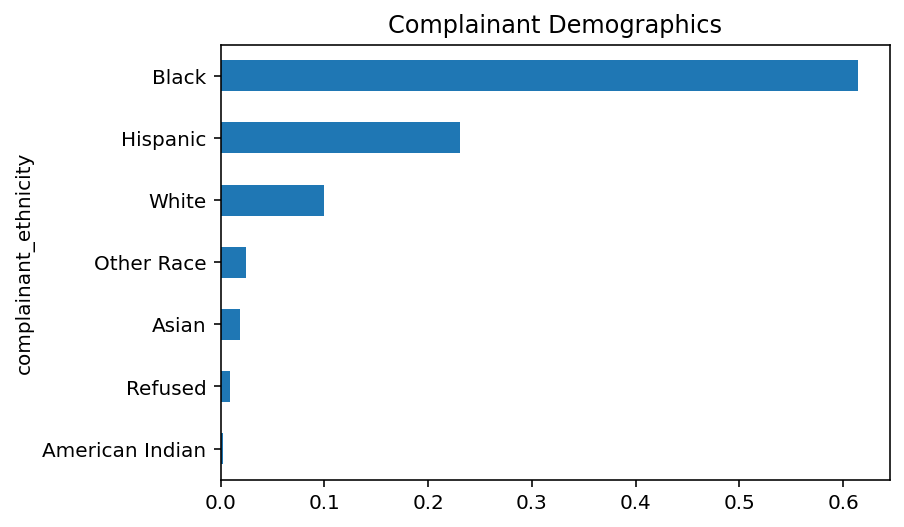

In [18]:
# What are the proportional demographics of the complainants?
ethnicity_counts = allegations.groupby("complainant_ethnicity").size()
ethnicity_props = (ethnicity_counts / ethnicity_counts.sum()).sort_values(ascending = False)
ethnicity_props.sort_values(ascending = True).plot.barh(title = "Complainant Demographics")
ethnicity_props

Complainants are mostly composed of Black and Hispanic individuals, indicating that many of the actions that these allegations entail may be racially motivated. We know from common knowledge that the proportional demographics of NYC look nothing like the above proportions.

Let's take a step away from the complainant data for now and look into the data regarding the NYPD.

White              0.541819
Hispanic           0.274297
Black              0.147611
Asian              0.035314
American Indian    0.000959
Name: mos_ethnicity, dtype: float64

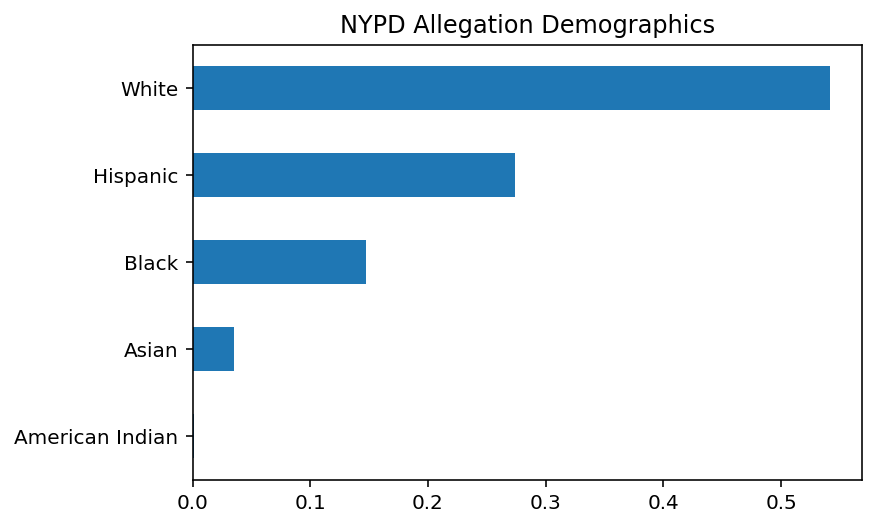

In [19]:
# Find proportions of NYPD member ethnicities
accused_demographics = allegations["mos_ethnicity"].value_counts(normalize=True)
accused_demographics.sort_values().plot(kind = "barh", title = "NYPD Allegation Demographics")
accused_demographics

The proportion of white NYPD members accused seems very high compared to other ethnicities. However, I'll also need to consider the demographics that make up the NYPD. Let's do some [external research](https://app.powerbigov.us/view?r=eyJrIjoiZTI4OTRjZTYtNTYwOC00NzcxLThhYTItOTU5NGNkMzIzYjVlIiwidCI6IjJiOWY1N2ViLTc4ZDEtNDZmYi1iZTgzLWEyYWZkZDdjNjA0MyJ9&pageName=ReportSection) to obtain the population's proportional demographics.

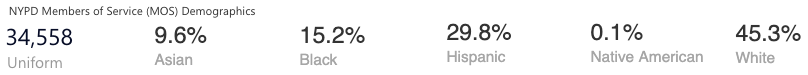

As of 10/05/2021, these are the proportional demographics of the NYPD. This doesn't help us too much, though, since our data goes all the way back to 1985, when the demographics of the NYPD may have looked much different. In order to compare the proportional demographics of the allegations made against NYPD members in the sample data (includes allegations up to July 2020) to recent proportional demographics of the NYPD, I'll filter the allegations to include only those filed in recent years.

In [20]:
def nypd_demographics(from_year):
    recent_allegations = allegations[allegations["year_received"] >= year]
    num_cops_recent = recent_allegations["shield_no"].unique()
    print("number of unique accused NYPD members from the data in the year {} forwards: ".format(
        str(year)) + str(num_cops_recent.shape[0]))
    return recent_allegations[recent_allegations["shield_no"].isin(
        num_cops_recent)]["mos_ethnicity"].value_counts(normalize = True)

In [21]:
# Determine number of unique nypd members with allegations against them from x year forwards to determine from what 
# year there is enough data to compare proportional demographics of the sample to the population
for year in [2018, 2019, 2020]:
    print(nypd_demographics(year), "\n")

number of unique accused NYPD members from the data in the year 2018 forwards: 1004
White       0.502928
Hispanic    0.310670
Black       0.144385
Asian       0.042017
Name: mos_ethnicity, dtype: float64 

number of unique accused NYPD members from the data in the year 2019 forwards: 496
White       0.506075
Hispanic    0.288578
Black       0.159781
Asian       0.045565
Name: mos_ethnicity, dtype: float64 

number of unique accused NYPD members from the data in the year 2020 forwards: 2
White    1.0
Name: mos_ethnicity, dtype: float64 



Since the data from 2020 only includes 2 NYPD members, allegation data from earlier years must be used. Since we have enough unique officers' data from 2019 onwards, allegations starting from 2019 will be used. These proportional demographics will be useful later on when hypothesis testing will be used to check if there is a significant difference between accused proportional demographics and the population's demographics.

For each NYPD member ethnicity, let's see if there are any seemingly concerning differences in proportions for allegations that ended with the NYPD member being substantiated (or found guilty).

In [22]:
pd.pivot_table(allegations, columns = "mos_ethnicity", index = "Substantiated", aggfunc = "size").apply(
    lambda val: val / val.sum())

mos_ethnicity,American Indian,Asian,Black,Hispanic,White
Substantiated,,,,,
False,0.875,0.689304,0.747766,0.746557,0.758216
True,0.125,0.310696,0.252234,0.253443,0.241784


This may be worth exploring further. We will delve deeper into substantiation by NYPD member ethnicity later on.

Over the years how has the substantiation rate changed? Does it ever look suspicious?

<AxesSubplot:title={'center':'Substantiation Rates Over Years'}, xlabel='year_received'>

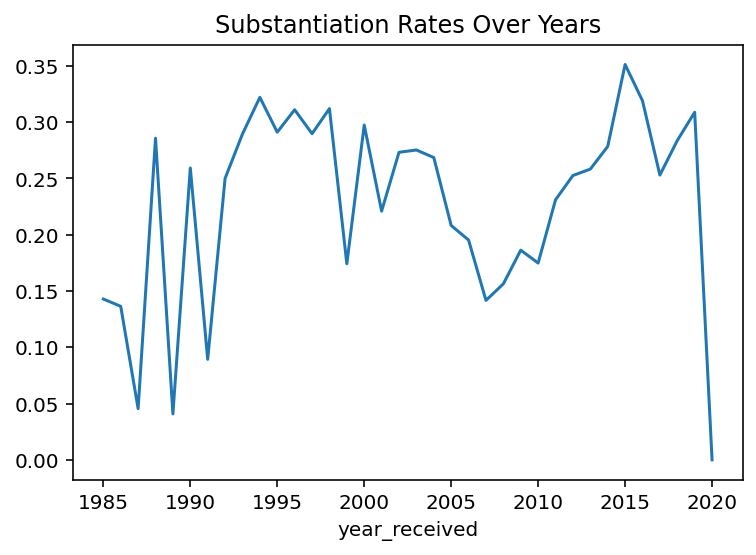

In [23]:
# Lineplot of Substantiaton proportions over each year
allegations.groupby("year_received")["Substantiated"].mean().plot(
    kind = "line", title = "Substantiation Rates Over Years")

It looks like there was a consistently low substantiation rate from 2004-2011. Could this be due to a lack of evidence being handed over from the NYPD during these years? Unfortunately, there are an enourmous amount of confounding variable that could cause changing substantiation rates over time.

Now let's see if there are precincts that have noticably more accusations filed historically.

precinct
75     0.065206
73     0.034914
44     0.034194
46     0.033624
67     0.033594
         ...   
20     0.003362
66     0.002672
17     0.002282
111    0.001111
22     0.000360
Length: 77, dtype: float64


<AxesSubplot:title={'center':'Proportion of Allegations by Precinct'}, ylabel='precinct'>

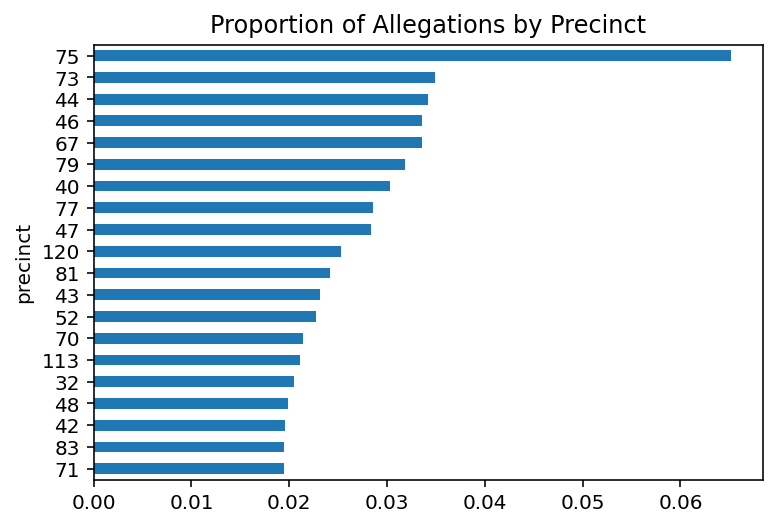

In [24]:
# Sort precincts by number of allegations
precincts = allegations.groupby("precinct").size().sort_values(ascending = False)
precinct_props = precincts / precincts.sum()
print(precinct_props)
precinct_props.head(20).sort_values().plot.barh(title = "Proportion of Allegations by Precinct")

Are the number of allegations in the 75th precinct still much larger than the others when given only the allegations filed from the last 10 years?

precinct
75     0.070392
46     0.035465
40     0.034976
79     0.033755
44     0.032045
         ...   
20     0.002736
66     0.002687
17     0.002638
111    0.001514
22     0.000391
Length: 77, dtype: float64


<AxesSubplot:title={'center':'Proportion of Allegations by Precinct (2010-2020)'}, ylabel='precinct'>

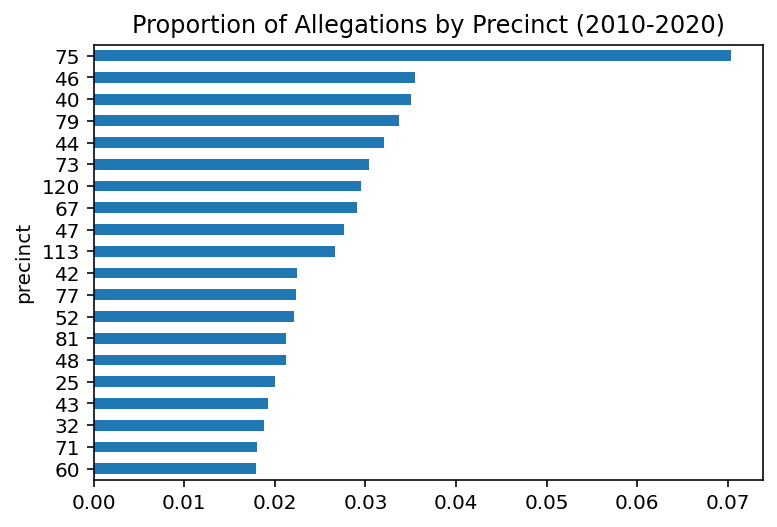

In [25]:
# Sort precincts by number of allegations for allegations filed in 2010 or later
precincts = allegations[allegations["year_received"] >= 2010].groupby(
    "precinct").size().sort_values(ascending = False)
precinct_props = precincts / precincts.sum()
print(precinct_props)
precinct_props.head(20).sort_values().plot.barh(title = "Proportion of Allegations by Precinct (2010-2020)")

The answer is yes!

For some reason, the 75th precinct contains a whopping 6.5% of the accusations against police offiers in the NYPD that the data includes. Perhaps the 75th precinct contains a greater population than the others?

From https://www.prisonpolicy.org/origin/ny/police_precincts.html:
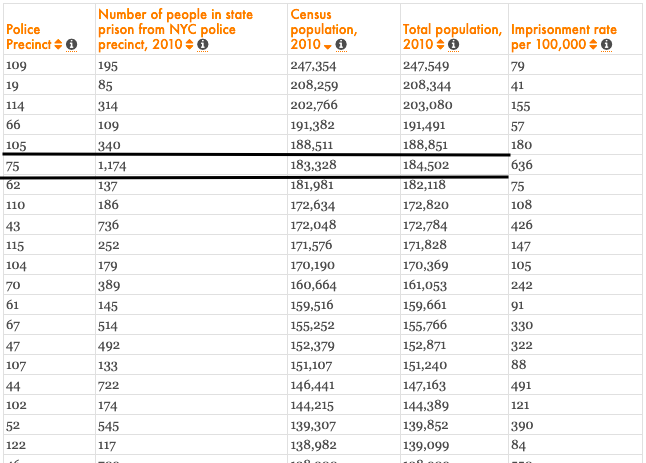

After sorting by census population, the 75th precinct is not significantly larger in population than the other precincts. Notice from this external data that the number of people in the state's prison from that precinct seems much higher than it is in other more populated precincts.

NYPD members that have had at least 3 allegations will be considered "suspicious". In order to see if there is an absurd amount of "suspicious" NYPD members in the 75th precinct, let's see how many of them come this area vs. other precincts.

In [26]:
# Find number of MYPD members in each precinct with at least 3 substantiated allegations
shield_nos = allegations[allegations["Substantiated"] == True].groupby("shield_no").size().sort_values(ascending=False)
susshield_nos = shield_nos[shield_nos >= 3].index
sus_only = allegations[allegations["shield_no"].isin(susshield_nos)]
grouped_by_sus = sus_only.groupby("shield_no").aggregate({"complainant_ethnicity": list, "precinct": max})
grouped_by_sus["precinct"].value_counts()

52     40
75     39
113    34
79     28
46     28
       ..
7       2
108     1
61      1
17      1
5       1
Name: precinct, Length: 75, dtype: Int64

The greatest number of "suspicious" NYPD members are part of precinct 75.
It is possible that the crime rate is much higher in this precinct than others, combined with the fact that the population is high, hence requiring more officers to be in the precinct. This, of course, would lead to there being a higher number of suspicious officers, since there are much more officers in the area as it is. Unfortunately, no data available to the public can be found that includes the amount of NYPD officers or the crime rates relative to population within each precinct over many years. This would help us determine if there is significantly more corruption in this area. Alternative to directly accessing NYC crime rates data, we can do some research, looking into the nature of this precinct.

[Dna.com's safety rankings](https://www.dnainfo.com/new-york/crime-safety-report/ranking/) describe the 75th precinct (aka East New York, Brooklyn) as being "once known as New York's worst killing field". The area's crime description reads: "Crime declined 70 percent from 1993 to 2010, with murders dropping to 33 incidents, representing a 74 percent decline for that category." Even after the fact, over half of the area's residents live in poverty and it ranks among the top 10 most dangerous places in NYC for violent crimes.  However, there are quite a few areas in NYC that have, over the last 10 years, had much more crime with far less allegations. Interestingly, when we looked at the proportions of allegations by precinct over the last 10 years, the 75th was proportionally even higher in allegations than it was overall. Finally, we can look at the number of allegations over the last 10 years per population for some of the ranking's most dangerous areas that are ranked above East New York before we become reasonably suspicious. The only areas we can consider are those whose boundaries line up decently with precinct boundaries (like the 75th precinct and East New York do). Geographical research cross-referenced with a [precinct map](https://www1.nyc.gov/site/nypd/bureaus/patrol/find-your-precinct.page) will help us match these areas to each precinct. We will then use the 2010 populations from before to calculate this metric. Unfortunately, more recent populations for each precinct could not be found.

In [27]:
# Create df showing which dangerous areas correspond to which precinct, with number of allegations in each included
areas_to_precinct = {"East New York": 75, "Greenwich Village & Meatpacking District": 6, "Brownsville": 73, 
         "Fort Greene & Clinton Hill": 88, "Bedford-Stuyvesant_a": 79, "Bedford-Stuyvesant_b": 81, "East Village": 9}
recent_yrs = allegations[allegations["year_received"] >= 2010]
as_df = pd.DataFrame({"precinct": areas_to_precinct.values()}, index = areas_to_precinct.keys())
num_nypd = recent_yrs.groupby("precinct").size().to_frame()
as_df.merge(num_nypd, how = "left", left_on = "precinct", right_index = True).rename(columns = {0: "allegations"})

,precinct,allegations
East New York,75,1441
Greenwich Village & Meatpacking District,6,125
Brownsville,73,622
Fort Greene & Clinton Hill,88,137
Bedford-Stuyvesant_a,79,691
Bedford-Stuyvesant_b,81,435
East Village,9,165


Lastly, we will hardcode calculate the number of allegations over the last 10 years per population for each area

In [28]:
metric = pd.Series(
    [1441 / 184502, 125 / 62262, 622 / 87330, 137 / 51648, (691 + 435) / (90988 + 63299) / 2, 165 / 76751], 
    index = ["East New York", "Greenwich Village & Meatpacking District", "Brownsville",
    "Fort Greene & Clinton Hill", "Bedford-Stuyvesant", "East Village"]).sort_values(ascending = False)
metric

East New York                               0.007810
Brownsville                                 0.007122
Bedford-Stuyvesant                          0.003649
Fort Greene & Clinton Hill                  0.002653
East Village                                0.002150
Greenwich Village & Meatpacking District    0.002008
dtype: float64

East New York has the highest allegations vs. population among NY's present-day most dangerous areas. With each of these other areas now considered more dangerous than East New York, why there are so many more accusations against 75th precinct NYPD members remains a concern. This deems this precinct especially suspicious. Let's consider the reviewers' decisions of the allegations for the 75th precinct vs. other precincts to see if there is a chance that NYPD members are often falsely accused in this precinct. The proportion of substantiated (the NYPD member did indeed do something wrong) cases in each precinct will be determined. These proportions should be taken with a grain of salt, though, since the CCRB (the reviewers) cannot always get the NYPD to hand over crucial bodycam evidence.

In [29]:
# Find the substantiation rates of the precincts
substantiation_props = allegations[allegations["year_received"] >= 2010].groupby("precinct")["Substantiated"].mean().sort_values()
print(substantiation_props)
substantiation_props.loc[75]

precinct
100    0.162791
77     0.200873
28     0.203488
101    0.204893
71     0.208108
         ...   
78     0.430556
20     0.446429
111    0.451613
5      0.456140
22     0.500000
Name: Substantiated, Length: 77, dtype: float64


0.22137404580152673

Surprisingly, the 75th precinct ranks quite low among Substantiation rate of all precincts. Even though these proportions are somewhat unreliable, let's apply them to the recent allegations per population of dangerous NYC areas metric that we calculated before by multiplying them to create one final metric. We'll do this so that if we still see that the 75th precinct tops the list, we should conduct a hypothesis test. This will help determine if there is likely some form of corruption within this precinct with all things considered.

In [30]:
# Multiply substantiation rates and allegations per population of dangerous NYC areas to produce new metric
metrics = pd.Series(metric * [substantiation_props.loc[75], substantiation_props.loc[73], (
    substantiation_props.loc[79] + substantiation_props.loc[81]) / 2, substantiation_props.loc[88],
    substantiation_props.loc[9], substantiation_props.loc[6]], index = metric.index).sort_values(
    # Multiplied by 100 just to get rid of unnecessary 0s in metric
    ascending = False) * 100
metrics

East New York                               0.172898
Brownsville                                 0.166037
Bedford-Stuyvesant                          0.095109
Fort Greene & Clinton Hill                  0.083256
Greenwich Village & Meatpacking District    0.054608
East Village                                0.045602
dtype: float64

Although the metric for East New York still looks high, we cannot yet say that there is likely some corruption going on in this precinct. We will need to do some testing, comparing East New York to these other areas (excluding Brownsville, since it is now looking suspicious as well) using this metric. This will be done in the Hypothesis testing section.

In [31]:
# Drop Brownsville, since it has become suspicious and we are focusing our anaylsis on the 75th precinct
metrics = metrics.drop("Brownsville")

### Assessment of Missingness

In [32]:
# largest proportions of missing data among columns
(allegations.isna().sum() / allegations.shape[0]).sort_values(ascending = False).head()

complainant_ethnicity       0.165028
shield_no                   0.161640
complainant_age_incident    0.144763
complainant_gender          0.125757
command_at_incident         0.046286
dtype: float64

Given the large proportion of missingness in the complainant ethnicity column, I'm curious what kind of missingness this column would be. Since there is an "Other" option for complainants to select for ethnicity, the NMAR case that a complainant feels that their ethnicity does not fit into one of the categories is dismissed. However, being that there is a long history of racist cops and police brutality in the US, it is very likely that the missingness of this column is NMAR. It's very plausible that a minority would leave their ethnicity missing when filing an allegation because they might feel that it undermines the claim or that the allegation would be disregarded. However, it is also likely that the type of missingness is MAR. With the large disparity in complainant and NYPD member ethnicities, I'll now see if the column's missingness is dependent on the accused NYPD member's ethnicity. I feel that this is likely to be the case because if, for example, a minority complainant is filing an allegation against a minority NYPD member, I feel that leaving ethnicity missing would be less concerning to them than if the NYPD member was white. This question also arises because a minority accusing a white NYPD member or a white person accusing a minority NYPD member might feel that their ethnicity puts them at a disadvantage in the reviewal of their case. This difference in ethnicity between complainant and NYPD member can always cause problems because of the looming history behind it.

Whether missingness of complainent ethnicity is dependent on ethnicity of the NYPD member will be assessed. It is hypothesized that a complainant is more/less likely to include their ethnicity based on the ethnicity of the NYPD member. The null hypothesis is that the distribution of NYPD member ethnicities is the same for observations with nonmissing complainant ethnicity and observations with missing complainant ethnicity. The alternative hypothesis is that the distributions of NYPD member ethnicities are not the same for observations with nonmissing complainant ethnicity and observations with missing complainant ethnicity. A significance level of 0.01 will be used for this test.

0.07250833190586378

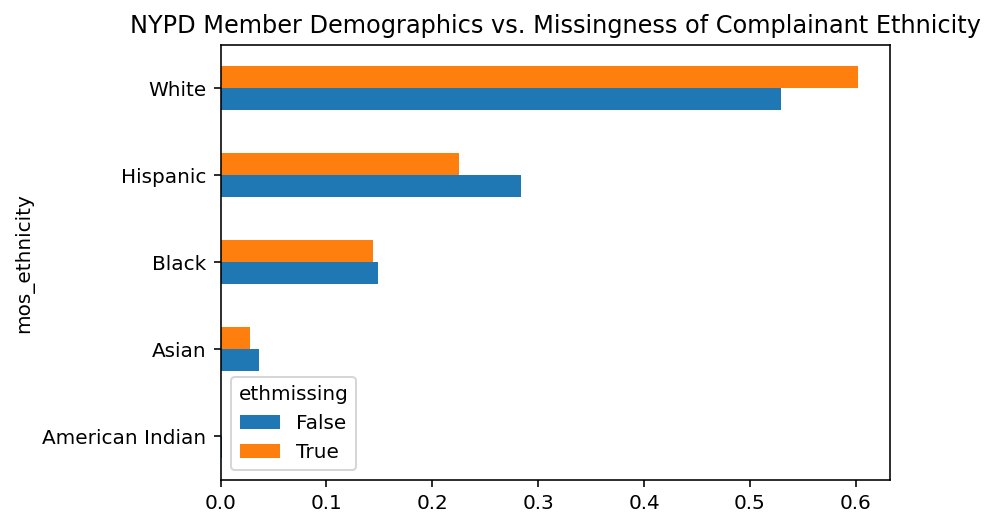

In [33]:
# Create isnull column which tells if complainant ethnicity is missing
ethnicitymissing = allegations.assign(ethmissing = allegations["complainant_ethnicity"].isnull())
# Set up TVD calculation
pt = ethnicitymissing.pivot_table(index = "ethmissing", columns = "mos_ethnicity", aggfunc = "size").apply(
    lambda x: x / x.sum(), axis = 1)
pt.T.plot(kind = "barh", title = "NYPD Member Demographics vs. Missingness of Complainant Ethnicity")
# Calculate observed TVD
obstvd = pt.diff().iloc[-1].abs().sum() / 2
obstvd

In [34]:
n_trials = 1000

tvds = []
for i in range(n_trials):
    # Shuffled the missingness column
    shuffled = ethnicitymissing.assign(shuffled = np.random.permutation(ethnicitymissing["ethmissing"]))
    # Calculate sample TVD
    samptvd = shuffled.pivot_table(index = "shuffled", columns = "mos_ethnicity", aggfunc = "size").apply(
    lambda x: x / x.sum(), axis = 1).diff().iloc[-1].abs().sum() / 2
    tvds.append(samptvd)

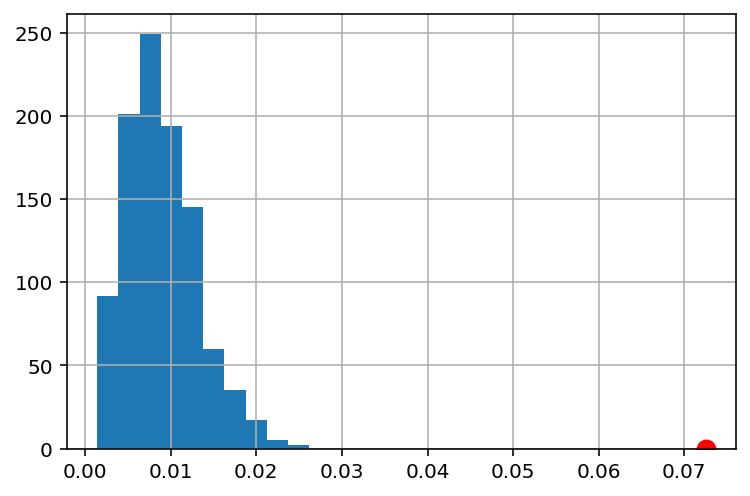

In [35]:
pd.Series(tvds).hist()
plt.scatter(obstvd, y = 0, color = "red", s = 80)

In [36]:
# Find p-value
np.count_nonzero(tvds >= obstvd) / n_trials

0.0

Through 1000 trials of permutation tests, a TVD as large as our observed is never seen. With a p-value of ~0, the null hypothesis is rejected. Therefore, it is extremely likely that whether a complainant includes their ethnicity is dependent on the ethnicity of the accused NYPD member. This could be due to difference of ethnicities from accuser to NYPD member that the accuser feels might impact the reviewers' decision for their case.

### Hypothesis Test

Let's look back at the recent proportional demographics of NYPD members as of 2021.

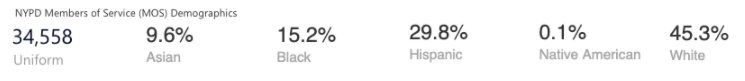

In [37]:
# Put these demographics into a dictionary
pop_demographics = pd.Series({"White": 0.453, "Hispanic": 0.298, "Black": 0.152, "Asian": 0.096, "American Indian": 0.001})
pop_demographics

White              0.453
Hispanic           0.298
Black              0.152
Asian              0.096
American Indian    0.001
dtype: float64

As noted before, allegations from 2019 forwards will be used so that the sample's proportional demographics of NYPD members are more aligned with the population's demographics.

In [38]:
# Take observed allegation proportional demographics
recent = allegations.loc[allegations["year_received"] >= 2019]
recent_dems = recent["mos_ethnicity"].value_counts(normalize = True)
recent_dems

White       0.506075
Hispanic    0.288578
Black       0.159781
Asian       0.045565
Name: mos_ethnicity, dtype: float64

As before stated, I'm curious if the proportional demographics of NYPD members with accusations against them is significantly different from the proportional demographics of NYPD members. To the eye, it looks like the proportion of White members with accusations against them is much higher than the proportion of White members in the population. It also looks like the proportion of Black and Asian members with accusations against them is much lower than the proportion of Black and Asian members in the population. Therefore, it is hypothesized that the proportional demographics of the accused NYPD members do not come from the distribution for proportional demographics of NYPD members. This is our alternative hypothesis. Our null hypothesis is that the proportional demographics of accused NYPD members does come from the distribution for proportional demographics of NYPD members. In order to test this, we will use total variation distance as our test statistic. We will be comparing the proportions for each ethnicity between the two groups of proportions. We will use a significance level of 0.01 for our test.

In [39]:
# Now I'll start the process of our hypothesis test by taking the observed TVD (since this is our test statistic)
obstvd = (pop_demographics - recent_dems).abs().sum() / 2
obstvd

0.060356622114216274

In [40]:
# This function calculates the p-value for a hypothesis test that uses tvd as the test statistic and compares
# proportional ethnicities of a sample to the proportional demographics of NYPD members
def hypoth_test_tvd(demprops, sample, obs, n_rep):
    demprops = demprops.to_dict()
    tvds = []
    for i in range(n_rep):
        # Pick an ethnicity from population demographics # of rows of sample with replacement
        sampled = np.random.choice(list(demprops.keys()), size = sample.shape[0], p = list(demprops.values()))
        sample_props = pd.Series(sampled).value_counts(normalize = True)
        # Calculate sample TVD
        tvds.append((pop_demographics - sample_props).abs().sum() / 2)
    return np.count_nonzero(tvds >= obs) / n_rep

In [41]:
# Out of 1000 trails, how often do is a tvd equal to or larger than our observed tvd seen?
hypoth_test_tvd(pop_demographics, recent, obstvd, 1000)

0.0

With a p-value of approximately 0, the null hypothesis is rejected. This means we would never see a random sample of NYPD members with the proportional demographics of the accused NYPD members in our sample. Therefore, it is extremely unlikely that the proportional demographics of accused NYPD members came from the distribution of proportional demographics of NYPD members. This means that for one or more of these ethnicities, far more or less NYPD members have accusations against them. Based off of our sample's accused proportional demographics it seems most likely that White NYPD members are accused more often than other ethnicities after normalization. Conclusively, there does appear to be racial bias in NYPD members accused.

We will now do the same for NYPD members that were found guilty of their accusations. This will help us to understand if accusers are more likely to make an accusation based on an NYPD member's ethnicity, or if there are actually far more/less NYPD members guilty of their allegations for each ethnicity.

In [42]:
# Filter to only include guilty NYPD members
guilty = recent[recent["Substantiated"] == True]
guiltyprops = guilty["mos_ethnicity"].value_counts(normalize = True)
# Find guilty demographics for NYPD members
guiltyprops

White       0.546351
Hispanic    0.270217
Black       0.147929
Asian       0.035503
Name: mos_ethnicity, dtype: float64

For this test, (similar to the first) our null hypothesis is that the proportional demographics of guilty NYPD members come from the distribution for proportional demographics of NYPD members. The alternative hypothesis is that the proportional demographics of guilty NYPD members do not come from the distribution for proportional demographics of NYPD members. Our test statistic will again be the total variation distance. We will use a significance level of 0.01 for this test.

In [43]:
obstvd = (pop_demographics - guiltyprops).abs().sum() / 2
obstvd

0.09285108481262327

In [44]:
# Out of 1000 trails, how often do is a tvd equal to or larger than our observed tvd seen?
hypoth_test_tvd(pop_demographics, guilty, obstvd, 1000)

0.0

Just like the previous test, we never see a random sample of NYPD members with the proportional demographics of the guilty NYPD members in our sample. This means our p-value is 0, so we reject the null hypothesis. Thus, it seems one or more ethnicities are guilty of their accusations far more/less often than the actual proportional demographics of the NYPD. It appears that White NYPD members are guilty of their accusations much more often than they should be, and that there is far more corruption occuring with NYPD members that are White. All in all, there is significant evidence of racial bias in ethnicity of officers guilty of accusations against them.

Now, we will further investigate corruption in the 75th precinct, where there appears to be a suspicious amount of allegations per population for substantiated NYPD members.

In [45]:
metrics

East New York                               0.172898
Bedford-Stuyvesant                          0.095109
Fort Greene & Clinton Hill                  0.083256
Greenwich Village & Meatpacking District    0.054608
East Village                                0.045602
dtype: float64

In this case, since we are comparing the metrics of some of the most dangerous areas in NYC that we calculated earlier to one another, we will be using a chi-square goodness-of-fit test. This is because we have multiple groups, and it would not be appropriate to compare the metric of the 75th precinct to the mean of all the other area's precincts. Since I have already conducted a DSC80-related hypothesis test, I figured it would be okay to use this test. Since we must test if, as a collective, the metrics are significantly different from one another, this test seems most appropriate for the situation. The null hypothesis is that the metrics are equal to one another. The alternative hypothesis is that the metrics are significantly different from one another. Since there are different crime rates and likely lots of error in the substantiation rate, we will use a very low significance level of 0.005 for this test. It is unspecified whether or not imports are allowed for this project, so I will be manually calculating the goodness-of-fit test statistic below. Since we have 5 areas, our degrees of freedom is 5 - 1 = 4.

Regarding the expected values in our GOF test, if we had not already seen that the 75th precinct has a much higher metric than the other dangerous areas, we would have actually set a lower expected value for it than the other areas. This is because these other areas are considered more dangerous, and we would think we would see a higher metric for them after we account for population and substantiation rate. However, this is not the case (as we have seen). Therefore, we have no choice but to set the expected values all equal to one another and assume equality among all groups given our null hypothesis. This does seem unproductive, since it will produce the highest possible value test statistic, but there is no expected value we can set with the context of the data. To validate this decision and give the benefit of the doubt, these other areas are considered more dangerous and major factors that would shoot the 75th precinct way above the others (for this metric) have been accounted for.

In [46]:
# Manually calculate goodness-of-fit test statistic
# The function takes in a series of groups and calculates the chi-square goodness-of-fit test statistic
def goodness_of_fit(props):
    # convert metrics to proportions of all metrics
    normalize = (props / props.sum()) * 100
    # expected value is the same for all, calculate this so there are equal proportions
    assumptionprop = (1 / len(props)) * 100
    test_stat = []
    for prop in normalize:
        # produce chi-square test stat, sum of all will be taken
        test_stat.append((prop - assumptionprop)**2 / assumptionprop)
    return sum(test_stat)

In [47]:
# Calculate GOF test statistic
goodness_of_fit(metrics)

24.940181815025042

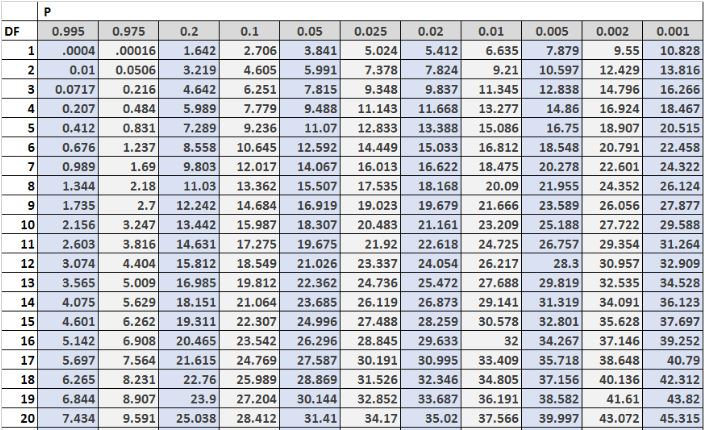

When comparing our goodness-of-fit test statistic to our chart with df = 4, our p-value is less than 0.001. Therefore, we reject our null hypothesis and can say that our groups are very much different. This was expected, and in a way, running the test on groups with such differing numbers didn't tell us much about the precinct we care about. What if we ran the same test on the series with the two other highest metrics to compare the only the top 3 most dangerous of the bunch. Would we still see significance? Our degree of freedom would now be 2, since we have 3 groups.

In [48]:
# Run chi-square GOF test on top 3 most dangerous of these areas
print(metrics[:3])
goodness_of_fit(metrics[:3])

East New York                 0.172898
Bedford-Stuyvesant            0.095109
Fort Greene & Clinton Hill    0.083256
dtype: float64


11.530808774111062

Yes, we would still reject our null hypothesis in this case. With this example, it is clear that the 75th precinct metric is significantly different than the others, being that the other two are very close together. With this, it is likely that the NYPD has some form of corruption within its 75th precinct, given the area's absurdly large allegations per population of substantiated members. 

It is worth mentioning that there is a documentary about corruption in the 80s within the 75th precinct called [The Seven Five](https://en.wikipedia.org/wiki/The_Seven_Five). [Here](https://theintercept.com/2020/08/23/nypd-75th-precinct-police-misconduct/) is a recent article covering recent corruption in the precinct.